In [1]:
import pandas as pd
import numpy as np
cladesList = ["Afrotheria","Artiodactyla","Carnivora","Chiroptera","Dermoptera","Eulipotyphla","Glires","Mammalia","Metatheria","Perissodactyla","Pholidota","Primates","Prototheria","Scandentia","Xenarthra"]

refs = ["Mammalia_ref","Primates_ref"]

In [2]:
sid2sp = {}
sid2tax = {}

with open('sequenceList.csv','r') as IN:
    
    for l in IN:
        sl=l.strip().split(';')
        sid2sp[sl[-1]] = sl[1]
        sid2tax[sl[-1]] = sl[0]

The goal of this notebook is to explore the difference between the indicator vectors computed using the full mammalia reference versus the one computed using primates only, in order to compose the different elements of Fig2.

# primates-only experiment

## step1 compute the distances

the goal here is to create a table (and associated file) containing, sequence ID, species name, taxon name, and difference distance the indicator vectors in the form of the euclidean distance and correlation

The distance used will be a simple euclidean distance.

> note : In general, we would be more interested in what happens in the structure matrix (ie. the correlation between indicator vectors). Nevertheless this can be interesting as well.


In [3]:
%%time
import pandas as pd
data = { 'sequenceID': [] , 'species' : [] , 'taxon':[] ,'dist':[] , 'corr':[]}

fileName = 'results/Mammalia_selected.Mammalia_selected_ref.indicVectors.csv'
df_M = pd.read_csv(fileName, index_col=0, header=None)

fileName = 'results/Mammalia_selected.Primates_selected_ref.indicVectors.csv'
df_P = pd.read_csv(fileName, index_col=0, header=None)

#check the indexes are the same
if (df_M.index == df_P.index).mean() != 1.0:
    print('error: index does not match between mammalian and primates indic vector lists')
    exit(1)
        
## compute distance between points
D = ((df_M - df_P)**2).sum(axis=1)
C = (df_M * df_P).sum(axis=1)
data['sequenceID'] += list(df_P.index)
data['species'] += [ sid2sp[x] for x in list(df_P.index)]
data['taxon'] += [ sid2tax[x] for x in list(df_P.index)]
data['dist'] += list(D)
data['corr'] += list(C)


CPU times: user 702 ms, sys: 40.4 ms, total: 743 ms
Wall time: 743 ms


Due to the nature of how indicator vectors are computed, they can be arbitrarily multiplied by -1.

That means that if we compute the correlation between indicator vectors it has a 50% chance to be negative.
For the purpose of simiilarity between the origin sequences, only the absolute value of this correlation matters.


In [4]:
df = pd.DataFrame(data)
df['Acorr'] = df['corr'].abs()
df.head()

,sequenceID,species,taxon,dist,corr,Acorr
0,GBMA6371-13,Cabassous unicinctus,Xenarthra,0.028635,0.985682,0.985682
1,GBMTG5358-16,Cabassous unicinctus,Xenarthra,0.027421,0.986290,0.986290
2,GBMNA13869-19,Cabassous unicinctus,Xenarthra,0.027421,0.986290,0.986290
3,GBMNA13876-19,Tolypeutes matacus,Xenarthra,0.029647,0.985177,0.985177
4,GBMTG5926-16,Tolypeutes matacus,Xenarthra,0.029647,0.985177,0.985177


In [5]:
df.taxon.value_counts()


Glires            120
Chiroptera        120
Primates          120
Artiodactyla      120
Carnivora         120
Eulipotyphla      120
Metatheria        117
Xenarthra          60
Perissodactyla     60
Afrotheria         45
Pholidota          21
Scandentia         16
Prototheria         7
Dermoptera          3
Name: taxon, dtype: int64

## step2  : Fig2A : boxplot of absolute correlation



Text(0.5, 0, 'absolute pearson correlation')

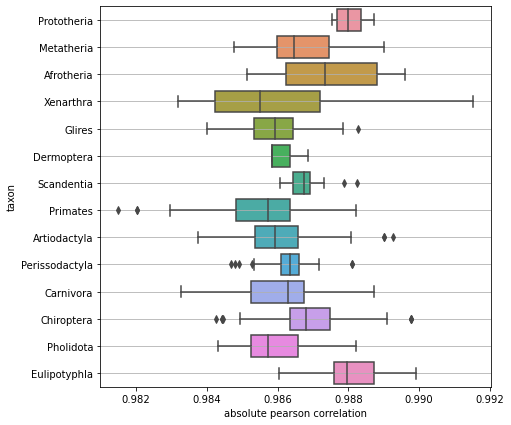

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
## let's look at absolute correlation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x='Acorr',y='taxon', data=df,ax=ax, order=['Prototheria','Metatheria',
                                                       'Afrotheria','Xenarthra',
                                                       'Glires','Dermoptera','Scandentia','Primates',
                                                       'Artiodactyla','Perissodactyla', 'Carnivora',
                                                       'Chiroptera','Pholidota','Eulipotyphla' ])
ax.yaxis.grid() # horizontal lines
ax.set_xlabel("absolute pearson correlation")

In [7]:
df.Acorr.min()

0.9814924856676619

In [8]:
M = df.groupby('taxon').Acorr.mean()
M.sort_values()

taxon
Primates          0.985609
Xenarthra         0.985894
Glires            0.985922
Pholidota         0.985987
Artiodactyla      0.986017
Carnivora         0.986078
Dermoptera        0.986185
Perissodactyla    0.986343
Metatheria        0.986647
Scandentia        0.986813
Chiroptera        0.986934
Afrotheria        0.987489
Prototheria       0.988043
Eulipotyphla      0.988134
Name: Acorr, dtype: float64

So, everything is >0.98..


# no-laurasiatheria experiment

## step1 compute the distances

the goal here is to create a table (and associated file) containing, sequence ID, species name, taxon name, and difference distance the indicator vectors in the form of the euclidean distance and correlation

The distance used will be a simple euclidean distance.

> note : In general, we would be more interested in what happens in the structure matrix (ie. the correlation between indicator vectors). Nevertheless this can be interesting as well.


In [9]:
%%time
import pandas as pd
data = { 'sequenceID': [] , 'species' : [] , 'taxon':[] ,'dist':[] , 'corr':[]}

fileName = 'results/Mammalia_selected.Mammalia_selected_ref.indicVectors.csv'
df_M = pd.read_csv(fileName, index_col=0, header=None)

fileName = 'results/Mammalia_selected.noLaurasiaTheria_selected_ref.indicVectors.csv'
df_P = pd.read_csv(fileName, index_col=0, header=None)

#check the indexes are the same
if (df_M.index == df_P.index).mean() != 1.0:
    print('error: index does not match between mammalian and primates indic vector lists')
    exit(1)
        
## compute distance between points
D = ((df_M - df_P)**2).sum(axis=1)
C = (df_M * df_P).sum(axis=1)
data['sequenceID'] += list(df_P.index)
data['species'] += [ sid2sp[x] for x in list(df_P.index)]
data['taxon'] += [ sid2tax[x] for x in list(df_P.index)]
data['dist'] += list(D)
data['corr'] += list(C)


CPU times: user 815 ms, sys: 19.5 ms, total: 834 ms
Wall time: 833 ms


In [10]:
df = pd.DataFrame(data)
df['Acorr'] = df['corr'].abs()
df.head()

,sequenceID,species,taxon,dist,corr,Acorr
0,GBMA6371-13,Cabassous unicinctus,Xenarthra,0.004112,0.997944,0.997944
1,GBMTG5358-16,Cabassous unicinctus,Xenarthra,0.004025,0.997987,0.997987
2,GBMNA13869-19,Cabassous unicinctus,Xenarthra,0.004025,0.997987,0.997987
3,GBMNA13876-19,Tolypeutes matacus,Xenarthra,0.004904,0.997548,0.997548
4,GBMTG5926-16,Tolypeutes matacus,Xenarthra,0.004904,0.997548,0.997548


In [11]:
df.taxon.value_counts()


Glires            120
Chiroptera        120
Primates          120
Artiodactyla      120
Carnivora         120
Eulipotyphla      120
Metatheria        117
Xenarthra          60
Perissodactyla     60
Afrotheria         45
Pholidota          21
Scandentia         16
Prototheria         7
Dermoptera          3
Name: taxon, dtype: int64

## step2  : Fig2B : boxplot of absolute correlation



Text(0.5, 0, 'absolute pearson correlation')

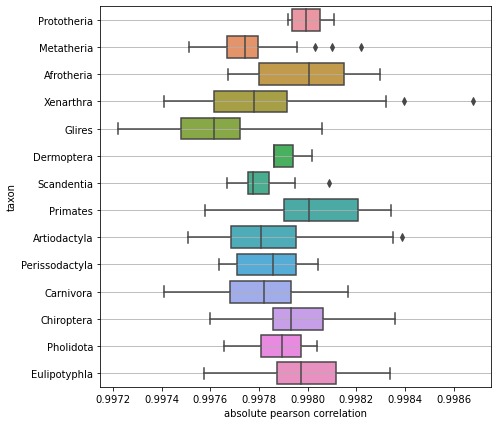

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
## let's look at absolute correlation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x='Acorr',y='taxon', data=df,ax=ax, order=['Prototheria','Metatheria',
                                                       'Afrotheria','Xenarthra',
                                                       'Glires','Dermoptera','Scandentia','Primates',
                                                       'Artiodactyla','Perissodactyla', 'Carnivora',
                                                       'Chiroptera','Pholidota','Eulipotyphla' ])
ax.yaxis.grid() # horizontal lines
ax.set_xlabel("absolute pearson correlation")

In [13]:
M = df.groupby("taxon").Acorr.mean()
M.sort_values()

taxon
Glires            0.997610
Metatheria        0.997736
Carnivora         0.997803
Xenarthra         0.997810
Scandentia        0.997811
Artiodactyla      0.997824
Perissodactyla    0.997838
Pholidota         0.997879
Dermoptera        0.997914
Chiroptera        0.997958
Afrotheria        0.997970
Eulipotyphla      0.997995
Prototheria       0.998000
Primates          0.998024
Name: Acorr, dtype: float64

In [14]:
df.Acorr.min()

0.9972211614069147

So, everything is >0.997

Let's check if the correlations tend to be worst in laurasiatheria.

In [15]:
laurasiatheria = df.taxon.isin(['Artiodactyla','Perissodactyla', 'Carnivora','Chiroptera','Pholidota','Eulipotyphla'])

import scipy.stats as stats

stats.mannwhitneyu( df.Acorr[laurasiatheria] , df.Acorr[~laurasiatheria] )


MannwhitneyuResult(statistic=168020.0, pvalue=1.997735730091749e-10)

<AxesSubplot:xlabel='Acorr', ylabel='taxon'>

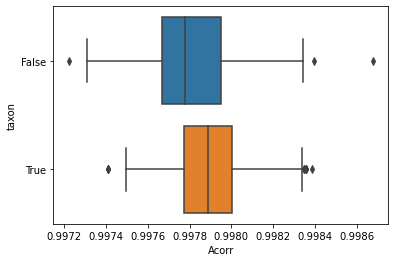

In [16]:
sns.boxplot(x='Acorr', y=laurasiatheria.astype(str), data=df)

In [17]:
df.groupby(laurasiatheria).Acorr.median()

taxon
False    0.997778
True     0.997889
Name: Acorr, dtype: float64

In [18]:
0.998069 - 0.997944

0.00012499999999993072

So there is support toward a difference, but it would not appear to be very large.

# Fig2C randomly missing elements


In [19]:
pmissing2N = {90:105,80: 210,70: 315,60: 420,50: 525,40: 629,30: 734,20: 839,10: 944}


In [20]:
%%time
import pandas as pd
data = { 'sequenceID': [] , 'species' : [] , 'taxon':[] ,'dist':[] , 
        'corr':[] , 'pmissing':[] , 'N':[] , 'rep':[]}

fileName = 'results/Mammalia_selected.Mammalia_selected_ref.indicVectors.csv'
df_M = pd.read_csv(fileName, index_col=0, header=None)

for pmissing in pmissing2N:
    for rep in range(10):
        fileName = 'results_random_exp/random{0}_{1}/Mammalia_selected.random{0}_{1}_ref.indicVectors.csv'.format(pmissing2N[pmissing] , rep)
        df_P = pd.read_csv(fileName, index_col=0, header=None)

        #check the indexes are the same
        if (df_M.index == df_P.index).mean() != 1.0:
            print('error: index does not match between mammalian and random indic vector lists')
            exit(1)

        ## compute distance between points
        D = ((df_M - df_P)**2).sum(axis=1)
        C = (df_M * df_P).sum(axis=1)
        data['sequenceID'] += list(df_P.index)
        data['species'] += [ sid2sp[x] for x in list(df_P.index)]
        data['taxon'] += [ sid2tax[x] for x in list(df_P.index)]
        data['dist'] += list(D)
        data['corr'] += list(C)
        data['pmissing'] += [ pmissing ] * len(D)
        data['N'] += [ pmissing2N[pmissing] ] * len(D)
        data['rep'] += [rep] * len(D)

CPU times: user 34.9 s, sys: 1.32 s, total: 36.3 s
Wall time: 36.2 s


In [21]:
df=pd.DataFrame(data)
df['Acorr'] = df['corr'].abs()
df.head()

,sequenceID,species,taxon,dist,corr,pmissing,N,rep,Acorr
0,GBMA6371-13,Cabassous unicinctus,Xenarthra,0.001599,0.999201,90,105,0,0.999201
1,GBMTG5358-16,Cabassous unicinctus,Xenarthra,0.001575,0.999213,90,105,0,0.999213
2,GBMNA13869-19,Cabassous unicinctus,Xenarthra,0.001575,0.999213,90,105,0,0.999213
3,GBMNA13876-19,Tolypeutes matacus,Xenarthra,0.001925,0.999037,90,105,0,0.999037
4,GBMTG5926-16,Tolypeutes matacus,Xenarthra,0.001925,0.999037,90,105,0,0.999037


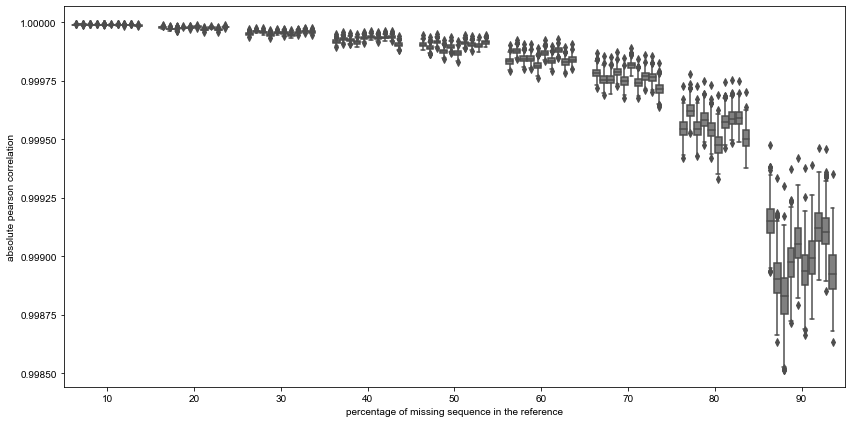

In [22]:
fig,ax = plt.subplots(figsize=(14,7))
sns.set(font_scale = 2)
sns.boxplot(x='pmissing',y='Acorr', hue='rep',data=df,ax=ax , palette=['grey'])
ax.set_ylabel('absolute pearson correlation' )
ax.set_xlabel('percentage of missing sequence in the reference')
ax.legend([],[], frameon=False)